### 0. Imports


In [1]:
import segmentation_models_pytorch as smp
import torch
import torchvision
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from torchvision import transforms
from torchvision.models import resnet18
from torch import nn

In [2]:
!pip install ultralytics
!pip install -U ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.96
    Uninstalling ultralytics-8.3.96:
      Successfully uninstalled ultralytics-8.3.96


In [3]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  

### 1. DataModule

The dataset used for this project is specifically sorted and arranged in this way:

```plaintext
DeepTrash-Yolov4/
├── train/
│   ├── images/
│   │   └── xxx.jpg
│   ├── labels/
│   │   └── xxx.txt
├── valid/
│   ├── images/
│   │   └── xxx.jpg
│   ├── labels/
│   │   └── xxx.txt
├── test/
│   ├── images/
│   │   └── xxx.jpg
│   ├── labels/
│   │   └── xxx.txt
```

You can download the curated and sorted dataset in the attached dataset file called `"DeepTrash-Yolov4"` which is already organized by me in the above order.
...

For reference:
```bash
mkdir -p ~/Desktop/DeepTrash-Yolov4/train/images
mkdir -p ~/Desktop/DeepTrash-Yolov4/train/labels
mkdir -p ~/Desktop/DeepTrash-Yolov4/valid/images
mkdir -p ~/Desktop/DeepTrash-Yolov4/valid/labels
mkdir -p ~/Desktop/DeepTrash-Yolov4/test/images
mkdir -p ~/Desktop/DeepTrash-Yolov4/test/labels

mv ~/Users/chloe-jinlei/Desktop/DeepTrash-Yolov4/train/*.jpg ~/Desktop/DeepTrash-Yolov4/train/images/
mv ~/Users/chloe-jinlei/Desktop/DeepTrash-Yolov4/valid/*.jpg ~/Desktop/DeepTrash-Yolov4/valid/images/
mv ~/Users/chloe-jinlei/Desktop/DeepTrash-Yolov4/test/*.jpg ~/Desktop/DeepTrash-Yolov4/test/images/
mv ~/Desktop/DeepTrash-Yolov4/train/*.txt ~/Desktop/DeepTrash-Yolov4/train/labels/
mv ~/Desktop/DeepTrash-Yolov4/valid/*.txt ~/Desktop/DeepTrash-Yolov4/valid/labels/
mv ~/Desktop/DeepTrash-Yolov4/test/*.txt ~/Desktop/DeepTrash-Yolov4/test/labels/
```


### 2. Model

In [4]:
model.train(
    data="/Users/chloe-jinlei/Desktop/ocean_trash.yaml",
    epochs=5, # you can choose more epochs here if time consumptions is less in your cp.
    imgsz=640,
    device="mps",
    verbose=True 
)

Ultralytics 8.3.98 🚀 Python-3.11.10 torch-2.6.0 MPS (Apple M2 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/chloe-jinlei/Desktop/ocean_trash.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

Fontconfig warning: ignoring UTF-8: not a valid region tag


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /Users/chloe-jinlei/Desktop/DeepTrash-Yolov4/train/labels.cache... 1886 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1886/1886 [00:00<?, ?it/s]
val: Scanning /Users/chloe-jinlei/Desktop/DeepTrash-Yolov4/valid/labels.cache... 624 images, 0 backgrounds, 0 corrupt: 100%|██████████| 624/624 [00:00<?, ?it/s]


Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train19
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.78G      1.686      2.516      1.684         38        640: 100%|██████████| 118/118 [02:11<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/20 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/20 [00:07<02:14,  7.10s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 2/20 [00:13<01:57,  6.55s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 3/20 [00:19<01:45,  6.18s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 4/20 [00:25<01:40,  6.26s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 5/20 [00:31<01:30,  6.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|███       | 6/20 [00:36<01:20,  5.73s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  35%|███▌      | 7/20 [00:41<01:10,  5.44s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 8/20 [00:47<01:08,  5.70s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▌     | 9/20 [00:53<01:03,  5.76s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 10/20 [00:58<00:57,  5.77s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 11/20 [01:05<00:55,  6.14s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 12/20 [01:12<00:49,  6.24s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  65%|██████▌   | 13/20 [01:19<00:44,  6.37s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 14/20 [01:26<00:40,  6.83s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 15/20 [01:33<00:33,  6.80s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 16/20 [01:41<00:28,  7.07s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  85%|████████▌ | 17/20 [01:46<00:19,  6.54s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 18/20 [01:52<00:12,  6.34s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▌| 19/20 [01:59<00:06,  6.62s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:07<00:00,  6.40s/it]


                   all        624        857      0.322      0.212      0.173     0.0729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      6.23G      1.834      2.159      1.746         23        640: 100%|██████████| 118/118 [03:02<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/20 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/20 [00:05<01:35,  5.00s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 2/20 [00:10<01:39,  5.54s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 3/20 [00:16<01:36,  5.66s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 4/20 [00:21<01:27,  5.48s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 5/20 [00:27<01:23,  5.57s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|███       | 6/20 [00:32<01:13,  5.28s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  35%|███▌      | 7/20 [00:38<01:11,  5.50s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 8/20 [00:42<01:02,  5.18s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▌     | 9/20 [00:48<00:59,  5.41s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 10/20 [00:53<00:52,  5.23s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 11/20 [00:58<00:46,  5.22s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 12/20 [01:05<00:45,  5.64s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  65%|██████▌   | 13/20 [01:11<00:40,  5.81s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 14/20 [01:16<00:33,  5.51s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 15/20 [01:21<00:26,  5.29s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 16/20 [01:27<00:22,  5.51s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  85%|████████▌ | 17/20 [01:32<00:16,  5.34s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 18/20 [01:36<00:10,  5.17s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▌| 19/20 [01:43<00:05,  5.52s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:47<00:00,  5.38s/it]

                   all        624        857      0.217      0.132     0.0775     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      6.57G      1.831      1.998      1.763         36        640: 100%|██████████| 118/118 [03:46<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/20 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/20 [00:07<02:26,  7.71s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 2/20 [00:14<02:11,  7.29s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 3/20 [00:20<01:52,  6.63s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 4/20 [00:26<01:41,  6.33s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 5/20 [00:32<01:35,  6.36s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|███       | 6/20 [00:43<01:51,  7.96s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  35%|███▌      | 7/20 [00:51<01:42,  7.87s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 8/20 [01:00<01:37,  8.10s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▌     | 9/20 [01:05<01:21,  7.38s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 10/20 [01:11<01:07,  6.79s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 11/20 [01:18<01:01,  6.87s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 12/20 [01:27<00:59,  7.50s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  65%|██████▌   | 13/20 [01:35<00:53,  7.58s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 14/20 [01:41<00:43,  7.24s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 15/20 [01:47<00:34,  6.96s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 16/20 [01:55<00:28,  7.10s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  85%|████████▌ | 17/20 [02:00<00:19,  6.40s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 18/20 [02:06<00:12,  6.37s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▌| 19/20 [02:13<00:06,  6.43s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:18<00:00,  6.92s/it]

                   all        624        857      0.298      0.119      0.105     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      6.86G       1.74      1.809      1.718         30        640: 100%|██████████| 118/118 [04:02<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/20 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/20 [00:04<01:22,  4.34s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 2/20 [00:12<01:55,  6.44s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 3/20 [00:19<01:58,  6.95s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 4/20 [00:27<01:53,  7.08s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 5/20 [00:35<01:54,  7.64s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|███       | 6/20 [00:44<01:50,  7.92s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  35%|███▌      | 7/20 [00:51<01:39,  7.66s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 8/20 [01:00<01:38,  8.17s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▌     | 9/20 [01:07<01:26,  7.86s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 10/20 [01:17<01:23,  8.38s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 11/20 [01:23<01:09,  7.76s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 12/20 [01:31<01:01,  7.71s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  65%|██████▌   | 13/20 [01:39<00:54,  7.82s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 14/20 [01:46<00:45,  7.62s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 15/20 [01:54<00:38,  7.78s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 16/20 [02:02<00:31,  7.85s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  85%|████████▌ | 17/20 [02:08<00:21,  7.16s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 18/20 [02:16<00:14,  7.49s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▌| 19/20 [02:22<00:07,  7.07s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:27<00:00,  7.35s/it]


                   all        624        857      0.324      0.143      0.105     0.0459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      7.21G      1.646      1.586      1.615         49        640: 100%|██████████| 118/118 [04:38<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/20 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/20 [00:09<02:58,  9.41s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 2/20 [00:18<02:49,  9.40s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 3/20 [00:29<02:51, 10.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 4/20 [00:37<02:24,  9.06s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 5/20 [00:48<02:28,  9.87s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|███       | 6/20 [00:56<02:08,  9.20s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  35%|███▌      | 7/20 [01:05<02:01,  9.34s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 8/20 [01:18<02:03, 10.26s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▌     | 9/20 [01:27<01:49, 10.00s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 10/20 [01:34<01:30,  9.01s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 11/20 [01:44<01:24,  9.37s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 12/20 [01:54<01:15,  9.39s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  65%|██████▌   | 13/20 [02:04<01:07,  9.70s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 14/20 [02:14<00:57,  9.65s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 15/20 [02:23<00:47,  9.47s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 16/20 [02:34<00:39,  9.94s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  85%|████████▌ | 17/20 [02:41<00:27,  9.30s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 18/20 [02:49<00:17,  8.84s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▌| 19/20 [02:56<00:08,  8.27s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [03:04<00:00,  9.23s/it]


                   all        624        857      0.517      0.146      0.141     0.0728

5 epochs completed in 0.493 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 6.2MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics 8.3.98 🚀 Python-3.11.10 torch-2.6.0 MPS (Apple M2 Pro)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/20 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 1/20 [00:09<02:53,  9.11s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 2/20 [00:16<02:22,  7.90s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 3/20 [00:21<01:57,  6.89s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 4/20 [00:28<01:49,  6.84s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 5/20 [00:35<01:41,  6.77s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  30%|███       | 6/20 [00:41<01:32,  6.63s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  35%|███▌      | 7/20 [00:47<01:21,  6.24s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  40%|████      | 8/20 [00:53<01:15,  6.28s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  45%|████▌     | 9/20 [00:59<01:09,  6.35s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 10/20 [01:05<01:01,  6.15s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  55%|█████▌    | 11/20 [01:13<00:59,  6.62s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  60%|██████    | 12/20 [01:20<00:54,  6.80s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  65%|██████▌   | 13/20 [01:27<00:47,  6.76s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  70%|███████   | 14/20 [01:36<00:46,  7.68s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 15/20 [01:43<00:36,  7.34s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  80%|████████  | 16/20 [01:49<00:28,  7.07s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  85%|████████▌ | 17/20 [01:55<00:20,  6.67s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|█████████ | 18/20 [02:01<00:12,  6.40s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▌| 19/20 [02:08<00:06,  6.44s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [02:14<00:00,  6.72s/it]


                   all        624        857      0.223      0.104     0.0714       0.03
Speed: 18.0ms preprocess, 37.9ms inference, 0.0ms loss, 129.3ms postprocess per image
Results saved to runs/detect/train19


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x346cf4f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

### 3. Evaluation

In [5]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.98 🚀 Python-3.11.10 torch-2.6.0 MPS (Apple M2 Pro)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/chloe-jinlei/Desktop/DeepTrash-Yolov4/valid/labels.cache... 624 images, 0 backgrounds, 0 corrupt: 100%|██████████| 624/624 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/39 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 1/39 [00:03<02:24,  3.80s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▌         | 2/39 [00:07<02:13,  3.60s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 3/39 [00:10<02:10,  3.64s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  10%|█         | 4/39 [00:14<02:04,  3.56s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  13%|█▎        | 5/39 [00:17<01:57,  3.47s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 6/39 [00:20<01:50,  3.34s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  18%|█▊        | 7/39 [00:24<01:54,  3.57s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 8/39 [00:28<01:53,  3.66s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  23%|██▎       | 9/39 [00:32<01:49,  3.65s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  26%|██▌       | 10/39 [00:36<01:46,  3.67s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  28%|██▊       | 11/39 [00:39<01:38,  3.53s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  31%|███       | 12/39 [00:42<01:34,  3.51s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 13/39 [00:46<01:30,  3.49s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 14/39 [00:49<01:28,  3.52s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 15/39 [00:53<01:24,  3.51s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  41%|████      | 16/39 [00:56<01:20,  3.50s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▎     | 17/39 [00:59<01:14,  3.37s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  49%|████▊     | 19/39 [01:06<01:05,  3.26s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  54%|█████▍    | 21/39 [01:13<01:03,  3.51s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▋    | 22/39 [01:16<00:59,  3.49s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  59%|█████▉    | 23/39 [01:20<00:55,  3.49s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▏   | 24/39 [01:23<00:52,  3.50s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 25/39 [01:28<00:52,  3.75s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  69%|██████▉   | 27/39 [01:36<00:47,  3.99s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  72%|███████▏  | 28/39 [01:41<00:44,  4.05s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  74%|███████▍  | 29/39 [01:45<00:41,  4.11s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  77%|███████▋  | 30/39 [01:49<00:37,  4.15s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 31/39 [01:53<00:31,  3.94s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  82%|████████▏ | 32/39 [01:57<00:28,  4.03s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  85%|████████▍ | 33/39 [02:00<00:23,  3.86s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  87%|████████▋ | 34/39 [02:04<00:18,  3.71s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  90%|████████▉ | 35/39 [02:08<00:15,  3.89s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  92%|█████████▏| 36/39 [02:11<00:11,  3.77s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  95%|█████████▍| 37/39 [02:16<00:07,  3.85s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [02:22<00:00,  3.66s/it]


                   all        624        857      0.362      0.244      0.206     0.0895
Speed: 3.3ms preprocess, 4.3ms inference, 0.0ms loss, 193.7ms postprocess per image
Results saved to runs/detect/train192
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0xa9f4e62d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03

In [21]:
results = model("/Users/chloe-jinlei/Desktop/DeepTrash-Yolov4/train/images/17_jpg.rf.b71a047b562a12bd0a33a654ec08ad23.jpg", conf=0.1,show=True)
# put certain image from dataset to check random results.


image 1/1 /Users/chloe-jinlei/Desktop/DeepTrash-Yolov4/train/images/17_jpg.rf.b71a047b562a12bd0a33a654ec08ad23.jpg: 640x640 4 trash_plastics, 102.8ms
Speed: 16.0ms preprocess, 102.8ms inference, 12.9ms postprocess per image at shape (1, 3, 640, 640)


### 4. CNN model

In [22]:
import PIL # if not installed please install using !pip install Pillow
print(PIL.__version__)
from PIL import Image
import torch

image_path = results[0].path 
original_image = Image.open(image_path)

cropped_images = []
for box in results[0].boxes.xyxy.cpu().numpy():
    x1, y1, x2, y2 = map(int, box)
    cropped = original_image.crop((x1, y1, x2, y2))
    cropped_images.append(cropped)

11.0.0


In [23]:

# define CNN model,binary classification
cnn_model = resnet18(pretrained=True)
cnn_model.fc = nn.Linear(cnn_model.fc.in_features, 2)  # 2 classes

# preprocess
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# define if it is plastic
cnn_model.eval()
for img in cropped_images:
    input_tensor = transform(img).unsqueeze(0)  # [1, 3, 224, 224]
    with torch.no_grad():
        output = cnn_model(input_tensor)
        pred = output.argmax(dim=1).item()
        print("prediction result:", "plastic " if pred == 1 else "non-plastic ")


/opt/anaconda3/envs/AI4EO/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/AI4EO/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


prediction result: plastic 
prediction result: plastic 
prediction result: plastic 
prediction result: plastic 


In [9]:
!pip install tensorboard

In [10]:
%load_ext tensorboard

In [19]:
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 66298), started 0:22:21 ago. (Use '!kill 66298' to kill it.)

### 4. U-NET Model 

In [12]:
!pip install segmentation-models-pytorch

In [24]:
import segmentation_models_pytorch as smp
import torch

unet_model = smp.Unet(
    encoder_name="resnet18",        
    encoder_weights="imagenet",    
    in_channels=3,                  
    classes=1                      
)

unet_model.eval() 

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [25]:
from torchvision import transforms

unet_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])


In [26]:
%matplotlib inline

[U-Net] Running segmentation on image 0 (plastic)


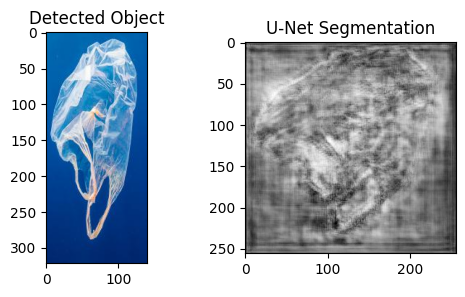

[U-Net] Running segmentation on image 1 (plastic)


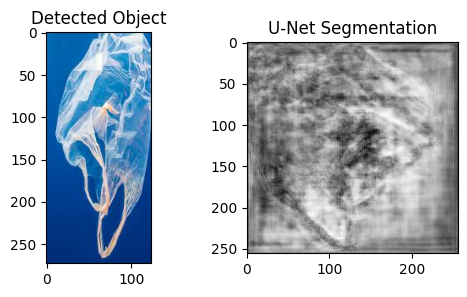

[U-Net] Running segmentation on image 2 (plastic)


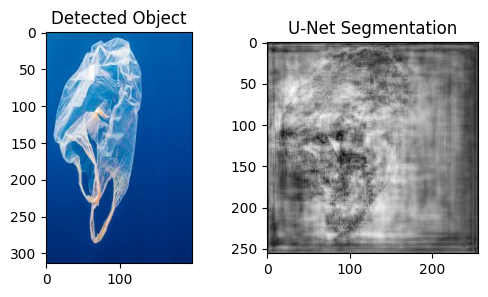

[U-Net] Running segmentation on image 3 (plastic)


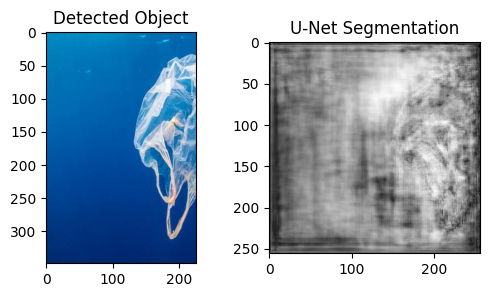

In [27]:
import matplotlib.pyplot as plt

for i, img in enumerate(cropped_images):
    # CNN determines whether it is plastic
    input_tensor = transform(img).unsqueeze(0)  # [1, 3, 224, 224]
    with torch.no_grad():
        cnn_output = cnn_model(input_tensor)
        pred = cnn_output.argmax(dim=1).item()
    
    # If it is plastic, use U-Net for segmentation
    if pred == 1:
        print(f"[U-Net] Running segmentation on image {i} (plastic)")
        
        unet_input = unet_transform(img).unsqueeze(0)  # [1, 3, 224, 224]
        with torch.no_grad():
            mask = unet_model(unet_input)
            mask = torch.sigmoid(mask).squeeze().numpy()  # [224, 224]
        
        # visualization + mask
        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title("Detected Object")
        
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("U-Net Segmentation")
        plt.show()
    else:
        print(f"[CNN] Prediction: non-plastic")


### 5. Brief Summary of the Pipeline

                  ┌────────────────────────────┐
                  │     Original Images        │
                  └────────────┬───────────────┘
                               │
             (Send the full images into the model)

                               ▼
                 ┌────────────────────────────┐
                 │  Step 1: Detect Objects    │
                 │     using YOLOv8 model     │
                 └────────────┬───────────────┘
                              │
     (The model draws boxes around possible trash items)

                              ▼
     ┌────────────────────────────────────────────┐
     │  Step 2: Cut out each box (small image)    │
     │   Each box might be plastic or not plastic │
     └─────────────────────┬──────────────────────┘
                           │
         (Send each small image into next model)

                           ▼
        ┌──────────────────────────────────────────┐
        │ Step 3: Check if it is plastic or not    │
        │    using a CNN image classification mode │
        └───────────────────┬──────────────────────┘
                            │
      (Only keep boxes that are predicted as plastic)

                            ▼
     ┌─────────────────────────────────────────────┐
     │ Step 4: Show the exact shape of the plastic │
     │     using a U-Net model (pixel by pixel)    │
     └─────────────────────────────────────────────┘


In [17]:
!pip freeze > requirements.txt